### Dataset check

Notebook for checking the content of the dataset

##### Colab

Prepairing setup & dataset to run notebook in Google Colab

In [ ]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

In [2]:
! pip install -q kaggle

In [3]:
from google.colab import userdata
import os

os.environ["kaggle_key"] = userdata.get('kaggle_key')
os.environ["kaggle_username"] = userdata.get('kaggle_username')

In [ ]:
!kaggle datasets download -d ravidussilva/real-ai-art
! unzip "real-ai-art"

##### Local & Colab

In [10]:
# Define paths for all supporting files & dataset
import sys, os

# Check if the code is running in Colab
IN_COLAB = 'google.colab' in sys.modules

if not IN_COLAB:
    # Load environment variables from .env file
    from dotenv import load_dotenv
    load_dotenv()
    project_root = os.getenv('PROJECT_ROOT_PATH')
    dataset_path = os.getenv('DATASET_PATH')
else:
    # Set the project root path for Colab
    project_root = userdata.get("project_root_path")
    dataset_path = userdata.get("dataset_path")

# Check if the project root path is set correctly
if project_root is None:
    raise ValueError("PROJECT_ROOT_PATH environment variable is not set.")

# Add the project root path to the system path
sys.path.append(project_root)

from scripts.viz import display_images
from datasets.AIArtBench import AIArtbench
from datasets.dataset import Subset
from datasets.preprocessing import CustomDatasetPreprocessor
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

#### Import dataset & look what's inside

In [3]:
# Process Data to print some images
preprocessor = CustomDatasetPreprocessor(dataset_path)
preprocessor.preprocess(fraction=1) #get only a fraction of data

# Get dataset splits
train_data, validation_data, test_data = preprocessor.get_splits()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


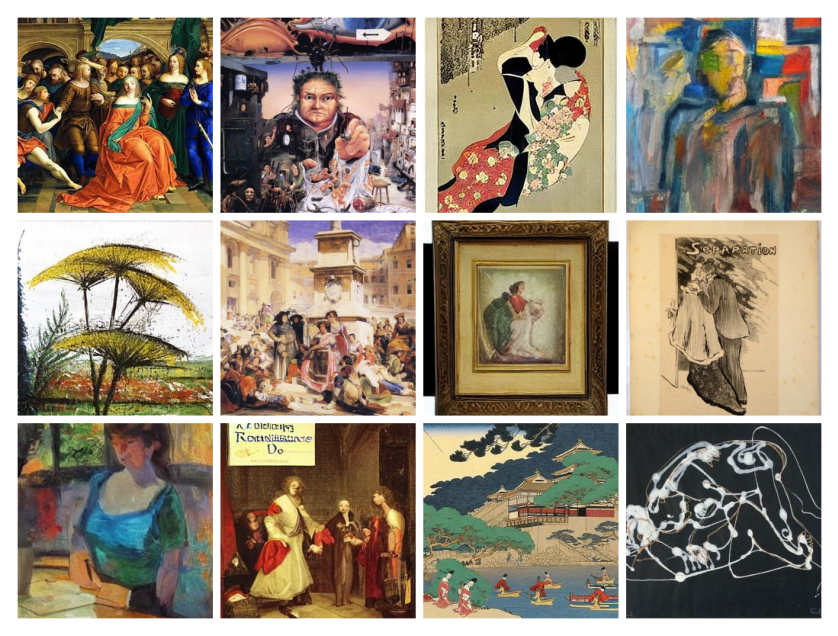

Class Labels:
AI_renaissance
human_surrealism
AI_ukiyo-e
AI_expressionism
human_expressionism
human_romanticism
AI_art_nouveau
human_art_nouveau
AI_post_impressionism
AI_renaissance
AI_ukiyo-e
human_surrealism


In [11]:
# Print images from train dataset + check how different transformations work
train_transform = transforms.Compose([
        transforms.Resize(size=(256, 256)),
        transforms.ToTensor()
    ])

# Prepare the training dataset and DataLoader
train_dataset = AIArtbench(dataframe=train_data, subset=Subset.TRAINING, transform=train_transform)
# Extract images
train_data_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, )
# Get unique class names
classes = train_dataset.get_classes()
# Display a few images from the training data
display_images(data_loader=train_data_loader, classes=classes, num_images=12, save_path="train_images_grid.png")